Running the experiment...
Printing histogram...


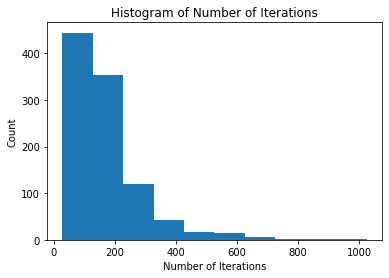

Printing second histogram


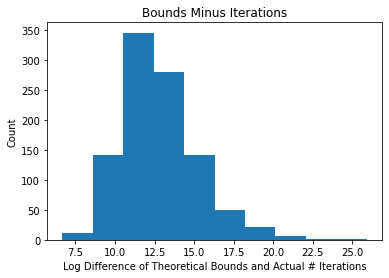

In [22]:
#!/usr/bin/python3
# Homework 1 Code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA
import random


def perceptron_learn(data_in):
    # Run PLA on the input data
    #
    # Inputs: data_in: Assumed to be a matrix with each row representing an
    #                (x,y) pair, with the x vector augmented with an
    #                initial 1 (i.e., x_0), and the label (y) in the last column
    # Outputs: w: A weight vector (should linearly separate the data if it is linearly separable)
    #        iterations: The number of iterations the algorithm ran for

    # Your code here, assign the proper values to w and iterations:
    N=data_in.shape[0]
    d =data_in.shape[1]-1
    w =np.zeros(d).reshape(d,1)
    x = data_in[:,:-1]
    y = data_in[:,-1]
    iterations =0
    i=0
    while i < N:
        if np.sign(x[i]@w)!= y[i]:
            w=w+y[i]*x[i].reshape(d,1)
            iterations+=1
            i=0
        else:
            i+=1
    return w, iterations


def perceptron_experiment(N, d, num_exp):
    # Code for running the perceptron experiment in HW1
    # Implement the dataset construction and call perceptron_learn; repeat num_exp times
    #
    # Inputs: N is the number of training data points
    #         d is the dimensionality of each data point (before adding x_0)
    #         num_exp is the number of times to repeat the experiment
    # Outputs: num_iters is the # of iterations PLA takes for each experiment
    #          bounds_minus_ni is the difference between the theoretical bound and the actual number of iterations
    # (both the outputs should be num_exp long)

    # Initialize the return variables
    num_iters = np.zeros((num_exp,))
    bounds_minus_ni = np.zeros((num_exp,))

    # Your code here, assign the values to num_iters and bounds_minus_ni:
    for j in range(num_exp):
        #w*
        wOpt = np.random.rand(d+1)
        wOpt[0]=0
        wOpt = wOpt.reshape(d+1,1)
        #Generate a random training set with N data points
        x0 = np.ones(N).reshape(N,1)
        df = np.random.uniform(-1, 1, size = (N,d))
        df = np.concatenate((x0,df),axis=1)
        #y
        ylabel =np.sign(df@wOpt).reshape(N,1)
        data = np.concatenate((df,ylabel),axis=1)
        #bound
#         print(df.shape)
#         print(wOpt.shape)
        values = df@wOpt
#         print(values.shape)
        a = ylabel*values
        a=a.reshape(1,N)[0]
#         print(a.shape)
        p = min(a)
        R=LA.norm(df,axis=1)
        R = max(R)
        wsqr = LA.norm(wOpt)
        bound = pow(R,2)*pow(wsqr,2)/pow(p,2)
#         print(R.shape)
        
        #run PLA
        w,num_iters[j]=perceptron_learn(data)
        bounds_minus_ni[j]=bound-num_iters[j]
    return num_iters, bounds_minus_ni


def main():
    print("Running the experiment...")
    num_iters, bounds_minus_ni = perceptron_experiment(100, 10, 1000)

    print("Printing histogram...")
    plt.hist(num_iters)
    plt.title("Histogram of Number of Iterations")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Count")
    plt.show()

    print("Printing second histogram")
    plt.hist(np.log(bounds_minus_ni))
    plt.title("Bounds Minus Iterations")
    plt.xlabel("Log Difference of Theoretical Bounds and Actual # Iterations")
    plt.ylabel("Count")
    plt.show()
    
if __name__ == "__main__":
    main()